<a href="https://www.kaggle.com/code/animeshrockn/playground-feb-1?scriptVersionId=90804094" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


In [2]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings # https://docs.python.org/3/library/warnings.html
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
df_train = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2022/train.csv")
df_test = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2022/test.csv")
print(df_train.shape)
print(df_test.shape)

(200000, 288)
(100000, 287)


In [4]:
# Label Encoding the Target Column
le = LabelEncoder()
df_train['target'] = le.fit_transform(df_train['target'])

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(mapping)

{'Bacteroides_fragilis': 0, 'Campylobacter_jejuni': 1, 'Enterococcus_hirae': 2, 'Escherichia_coli': 3, 'Escherichia_fergusonii': 4, 'Klebsiella_pneumoniae': 5, 'Salmonella_enterica': 6, 'Staphylococcus_aureus': 7, 'Streptococcus_pneumoniae': 8, 'Streptococcus_pyogenes': 9}


In [5]:
# Dividing Train and Test data
final_test = df_test.drop(["row_id"],axis = 1)
X = df_train.drop(["row_id","target"],axis = 1)
y = df_train['target']

In [6]:
# Normalizing the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
final_test = scaler.fit_transform(final_test)

In [7]:
# Splitting data into 90,10 for train and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 42)
print('X_train', X_train.shape)
print('Y_train', y_train.shape)
print('X_test', X_test.shape)
print('Y_test', y_test.shape)

X_train (180000, 286)
Y_train (180000,)
X_test (20000, 286)
Y_test (20000,)


In [8]:
# Sequential Model definition

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential()
model.add(Dense(143, activation='relu', kernel_initializer='normal', input_dim = 286))
model.add(Dense(70, activation='relu'))
model.add(Dense(10, activation='sigmoid',kernel_initializer='normal'))

# Compiling model for loss and optimized

opt = Adam(lr=0.001)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = opt )

2022-03-21 09:19:51.073336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 09:19:51.178359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 09:19:51.179565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 09:19:51.181111: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 143)               41041     
_________________________________________________________________
dense_1 (Dense)              (None, 70)                10080     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                710       
Total params: 51,831
Trainable params: 51,831
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model Training

model.fit(X_train,y_train, epochs = 50, batch_size = 32,verbose = 1)

2022-03-21 09:19:54.195288: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
5625/5625 [==============================] - 11s 2ms/step - loss: 0.5566
Epoch 2/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.2615
Epoch 3/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.1898
Epoch 4/50
5625/5625 [==============================] - 10s 2ms/step - loss: 0.1535
Epoch 5/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.1304
Epoch 6/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.1183
Epoch 7/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.1066
Epoch 8/50
5625/5625 [==============================] - 10s 2ms/step - loss: 0.0971
Epoch 9/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0893
Epoch 10/50
5625/5625 [==============================] - 10s 2ms/step - loss: 0.0808
Epoch 11/50
5625/5625 [==============================] - 10s 2ms/step - loss: 0.0778
Epoch 12/50
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0

In [11]:
# Prediction from model on validation set
result = model.predict(X_test)

#selecting the max output
pred = result.argmax(axis = 1)

 Model Accuracy on Validation set : 0.9171


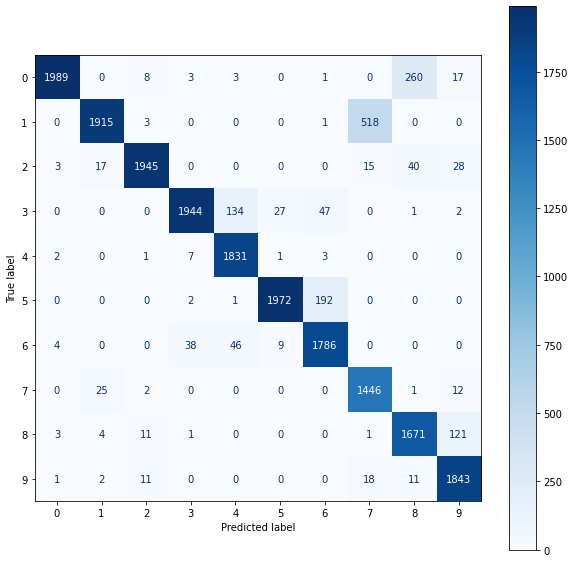

In [12]:
# Exploring the Prediction

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from matplotlib.pyplot import figure

print(f' Model Accuracy on Validation set : {accuracy_score(pred,y_test)}')


# Printing Confusion matrix for multiclass

cm = confusion_matrix(pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)

In [13]:
# Testing model on test data and submitting score

final_result = model.predict(final_test)
final_pred = final_result.argmax(axis = 1)

In [14]:
final_prediction = le.inverse_transform(final_pred)

In [15]:
# Creating Submission file to submit prediction
Submission = pd.DataFrame(data = {'row_id': df_test['row_id'], 'target': final_prediction})
Submission

,row_id,target
0,200000,Escherichia_coli
1,200001,Klebsiella_pneumoniae
2,200002,Bacteroides_fragilis
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Enterococcus_hirae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [16]:
Submission.to_csv('Submission', index = False)
Submission.head()

,row_id,target
0,200000,Escherichia_coli
1,200001,Klebsiella_pneumoniae
2,200002,Bacteroides_fragilis
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
